In [121]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('03-deep-neural-networks-gpu')
jovian.set_colab_id('1w0V95YUmb9yYY5wit-eBeXGImVsnWtZu')

# Training Deep Neural Networks on GPU

In [122]:
import torch
import torchvision
from torchvision.datasets import MNIST
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
import torch.nn as nn
%matplotlib inline

In [123]:
dataset = MNIST(root='data/',download=True,transform=ToTensor())

In [124]:
len(dataset)

60000

In [125]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [126]:
dataset[0][0].shape

torch.Size([1, 28, 28])

Shape of pytorch image is of form channel x length x width. But plt.imshow uses l x w x c. 

So we permute the dimensions to display

In [127]:
image, label = dataset[0]
image.shape

torch.Size([1, 28, 28])

In [128]:
image.permute(1,2,0).shape

torch.Size([28, 28, 1])

In [129]:
image[0].shape

torch.Size([28, 28])

label :  5


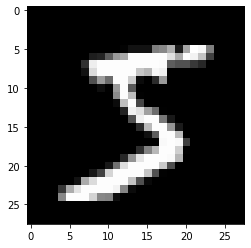

In [130]:
plt.imshow(image[0], cmap='gray')
print("label : ",label)

Use random_split to create validation and training set

In [131]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, valid_ds = random_split(dataset,[train_size, val_size])
len(train_ds), len(valid_ds)

(50000, 10000)

In [132]:
batch_size = 128

In [133]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True,num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape:  torch.Size([128, 1, 28, 28])


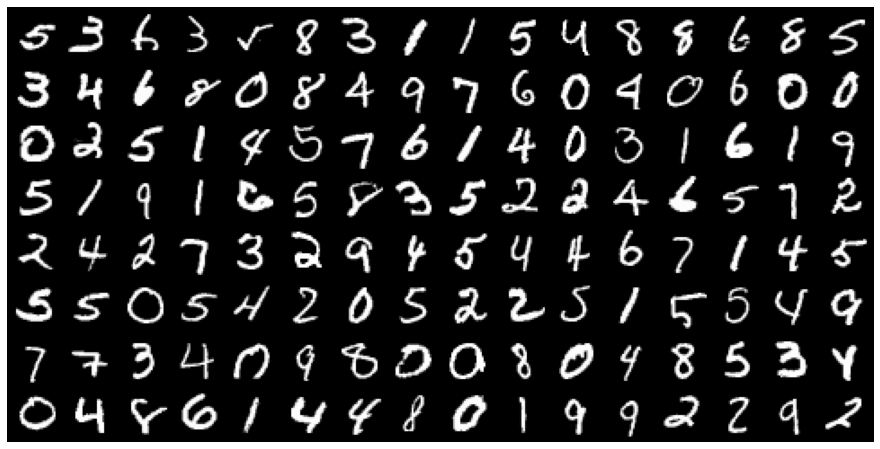

In [134]:
for images, _ in train_loader:
  print('images.shape: ', images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute((1,2,0)))
  break

## Activation Function , Hidden Layers 

In [135]:
for images,labels in train_loader:
  print("Images shape : ",images.shape)
  inputs = images.reshape(-1,784)
  print("inputs.shape :",inputs.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Images shape :  torch.Size([128, 1, 28, 28])
inputs.shape : torch.Size([128, 784])


it is flattened i.e to pass it into linear model

In [136]:
input_size = inputs.shape[-1]
hidden_size = 32

In [137]:
layer1 = nn.Linear(input_size, hidden_size)

In [138]:
layer1_outputs = layer1(inputs)
print('layer1.shape :',layer1_outputs.shape)

layer1.shape : torch.Size([128, 32])


In [139]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
print('layer1_outputs_direct.shape :',layer1_outputs_direct.shape)

layer1_outputs_direct.shape : torch.Size([128, 32])


In [140]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [141]:
layer1_outputs

tensor([[ 1.1027e-01, -5.3638e-01, -3.4261e-01,  ..., -1.0217e-01,
         -2.0833e-01, -2.3278e-02],
        [ 1.1874e-01, -2.5141e-01, -1.8263e-01,  ...,  2.8383e-01,
         -4.7588e-02,  1.3466e-01],
        [-1.7525e-02, -2.0816e-01, -4.2296e-01,  ...,  2.3628e-01,
         -1.0869e-01,  2.0198e-01],
        ...,
        [ 2.3676e-02,  6.9864e-05, -4.1668e-01,  ..., -3.4028e-02,
         -8.5022e-02, -1.8333e-01],
        [ 1.6697e-01, -1.7807e-01, -2.8666e-01,  ...,  4.6662e-02,
          1.8736e-02,  1.3470e-01],
        [ 2.6600e-03,  1.4522e-01, -2.4290e-01,  ...,  2.2511e-02,
         -1.2813e-01,  1.0385e-02]], grad_fn=<AddmmBackward>)

In [142]:
F.relu(torch.tensor([[1, -1, 3],
                     [-3, 100, -324]]))

tensor([[  1,   0,   3],
        [  0, 100,   0]])

In [143]:
relu_outputs = F.relu(layer1_outputs)
print('relu_outputs.shape:',relu_outputs.shape)
print('min(layer1_outputs):',torch.min(layer1_outputs))
print('min(relu_outputs):',torch.min(relu_outputs))

relu_outputs.shape: torch.Size([128, 32])
min(layer1_outputs): tensor(-0.7350, grad_fn=<MinBackward1>)
min(relu_outputs): tensor(0., grad_fn=<MinBackward1>)


Relu is the activation function, as it establishes a non-linear relation between inputs and outputs

In [144]:
output_size = 10
layer2 = nn.Linear(hidden_size,output_size)

In [145]:
layer2_outputs = layer2(relu_outputs)

In [146]:
layer2_outputs.shape

torch.Size([128, 10])

In [147]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3050, grad_fn=<NllLossBackward>)

In [148]:
# Expanded Version
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias)

In [149]:
torch.allclose(layer2_outputs, outputs, 1e-3)

True

## Deep Neural Network Model

In [150]:
class MnistModel(nn.Module):
  """Defines a Neural netwotk with single hidden layer"""
  def __init__(self, in_size, hidden_size, out_size):
    super().__init__()
    # hidden layer
    self.linear1 = nn.Linear(in_size, hidden_size)
    # output layer
    self.linear2 = nn.Linear(hidden_size, out_size)

  def forward(self, xb):
    """ Does the forward propagation """
    # Flatten the image tensors
    xb = xb.view(xb.size(0), -1)
    # get intermediate outputs of hidden layer
    out = self.linear1(xb)
    # apply activation function
    out = F.relu(out)
    # get final outputs of layer2
    out = self.linear2(out)
    return out

  def training_step(self, batch):
    """ Returns loss for a batch of training data"""
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    """ Returns accuracy and loss for a batch of validation data"""
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, num_epochs, results):
    print("Epoch [{}/{}] : val_loss:{:.4f}, val_acc:{:.4f}".format(epoch,num_epochs,results['val_loss'],results['val_acc']))


In [151]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / preds.numel())

We'll create a model with 32 activations

In [152]:
input_size = 784
hidden_size = 32
output_size = 10

In [153]:
model = MnistModel(input_size,hidden_size,output_size)

Let's take a look at Model parameters

In [154]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


let's try and generate some outputs and analyze them

In [155]:
for images, labels in train_loader:
  outputs = model(images)
  break

loss = F.cross_entropy(outputs,labels)
print('Loss: ',loss.item())
print('outputs.shape :',outputs.shape)
print('Sample outputs :\n',outputs[:2].data)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss:  2.3376400470733643
outputs.shape : torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2200, -0.1394,  0.2360,  0.1726,  0.1442, -0.0216,  0.0324, -0.3107,
         -0.1208, -0.0704],
        [-0.2774, -0.2078,  0.2872,  0.1252,  0.1756,  0.0131,  0.1329, -0.1450,
         -0.0409, -0.0132]])


# Using a GPU

Check if GPU is available

In [156]:
torch.cuda.is_available()

True

In [157]:
def get_default_device():
  """Pick GPU if availabel, else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [158]:
device = get_default_device()
device

device(type='cuda')

Now let's define a function that can move data and model to the device

In [159]:
def to_device(data, device):
  if isinstance(data, (list,tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

In [160]:
for images, labels in train_loader:
  print(images.shape)
  print("Initial device :",images.device)
  images = to_device(images, device)
  print("After moving : ",images.device)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
Initial device : cpu
After moving :  cuda:0


We should manually move every batch into GPU. 

To avoid this we can define a class to move all the data into GPU before training

In [161]:
class DeviceDataLoader():
  """ Wrap a dataloader to move data into device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """ Yeild a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """ Number of batches"""
    return len(self.dl)

'yield' creates a generator function which can be used with for loop

Now we can wrap our data into DeviceDataloaders

In [162]:
train_loader = DeviceDataLoader(train_loader, device)
valid_loader = DeviceDataLoader(valid_loader, device)

In [163]:
for xb,yb in train_loader:
  print('xb.device :',xb.device)
  print('xb :',yb)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


xb.device : cuda:0
xb : tensor([2, 1, 7, 6, 4, 3, 8, 1, 7, 3, 6, 2, 8, 4, 9, 5, 2, 0, 2, 1, 6, 1, 9, 9,
        5, 7, 3, 1, 6, 2, 7, 2, 7, 9, 3, 4, 1, 5, 3, 8, 5, 3, 1, 3, 7, 8, 4, 9,
        0, 7, 0, 6, 6, 0, 0, 1, 1, 9, 2, 2, 1, 0, 7, 5, 8, 0, 6, 8, 6, 4, 9, 8,
        2, 9, 5, 4, 3, 2, 1, 5, 1, 0, 4, 9, 9, 3, 4, 7, 2, 8, 1, 7, 0, 9, 1, 5,
        4, 3, 3, 6, 7, 4, 4, 1, 3, 7, 8, 3, 0, 4, 6, 5, 5, 1, 8, 2, 2, 1, 2, 6,
        3, 0, 1, 9, 9, 3, 0, 6], device='cuda:0')


# Training the Model

In [164]:
def evaluate(model, valid_loader):
  """Evaluate Model's performance on valid set"""
  outputs = [model.validation_step(x) for x in valid_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_dl, valid_dl, opt_func=torch.optim.SGD):
  """ Train the model using gradient descent """

  optimizier = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    # training Phase
    for batch in train_dl:
      loss = model.training_step(batch)
      loss.backward()
      optimizier.step()
      optimizier.zero_grad()

    val_result = evaluate(model, valid_dl)
    model.epoch_end(epoch, epochs, val_result)
    history.append(val_result)
  return history

Above is the Standard fit function with Gradient Descent

We should also load model onto GPU

In [165]:
# model on GPU
model = MnistModel(input_size, hidden_size, output_size)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [166]:
device

device(type='cuda')

Check Model performance on valid set

In [167]:
history = [evaluate(model, valid_loader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.12509766221046448, 'val_loss': 2.3232505321502686}]

Initial accuracy is around 14%. As it is randomly initialised model

Now lets train the model

In [168]:
history += fit(5, 0.5, model, train_loader, valid_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0/5] : val_loss:0.2256, val_acc:0.9353
Epoch [1/5] : val_loss:0.1731, val_acc:0.9477
Epoch [2/5] : val_loss:0.1530, val_acc:0.9530
Epoch [3/5] : val_loss:0.2050, val_acc:0.9356
Epoch [4/5] : val_loss:0.1399, val_acc:0.9600


In [169]:
history += fit(5, 0.1, model, train_loader, valid_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0/5] : val_loss:0.1264, val_acc:0.9636
Epoch [1/5] : val_loss:0.1214, val_acc:0.9657
Epoch [2/5] : val_loss:0.1215, val_acc:0.9653
Epoch [3/5] : val_loss:0.1218, val_acc:0.9647
Epoch [4/5] : val_loss:0.1197, val_acc:0.9657


Text(0.5, 1.0, 'Loss vs Epochs')

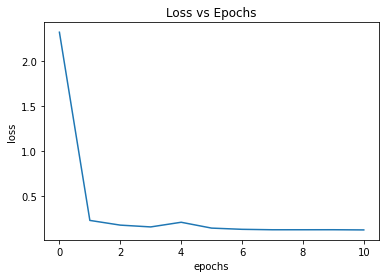

In [170]:
losses = [x['val_loss'] for x in history]
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')

Text(0.5, 1.0, 'Accuracy vs Epochs')

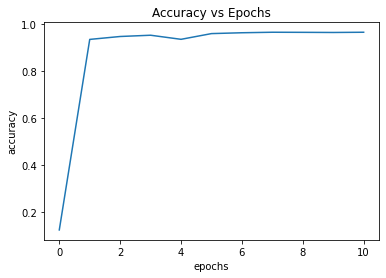

In [172]:
accuracy = [x['val_acc'] for x in history]
plt.plot(accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epochs')

In [176]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0183, -0.0227,  0.0214,  ...,  0.0277,  0.0317,  0.0228],
         [-0.0285,  0.0189, -0.0352,  ..., -0.0037, -0.0055, -0.0215],
         [-0.0114,  0.0268,  0.0241,  ...,  0.0292,  0.0144,  0.0097],
         ...,
         [-0.0278,  0.0125,  0.0271,  ..., -0.0231,  0.0262,  0.0349],
         [ 0.0052, -0.0039,  0.0187,  ..., -0.0044, -0.0017, -0.0226],
         [ 0.0255, -0.0048, -0.0202,  ...,  0.0009, -0.0135, -0.0284]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([ 0.3283, -0.0748, -0.1984, -0.0528,  0.3730,  0.0965, -0.1883,  0.0980,
         -0.2822,  0.3451,  0.0236,  0.7750,  0.1755,  0.3888,  0.0228,  0.0538,
          0.1063,  0.0793, -0.0274,  0.2262, -0.0883,  0.0439,  0.4038, -0.1169,
          0.0271, -0.2392,  0.2337,  0.3041, -0.1724, -0.0261,  0.0097, -0.3595],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([[-0.1961, -0.1312, -0.4367, -0.8034, -0.0779, -0.2606,  0.2023, -0

Current model Outperforms Logistic regression which achived 86% and neural network did by 96%

# Testing with individual images

In [193]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform= ToTensor())

In [194]:
# define a helper function
def predict_image(img, model):
  xb = to_device(img.unsqueeze(0), device)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7  predicted: 7


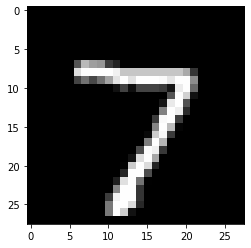

In [195]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ' predicted:',predict_image(img, model))

Label: 2  predicted: 2


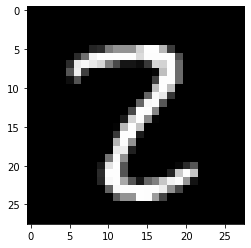

In [196]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ' predicted:',predict_image(img, model))

Label: 9  predicted: 9


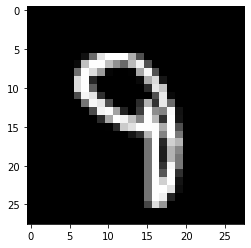

In [188]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ' predicted:',predict_image(img, model))

In [197]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)

In [202]:
evaluate(model, test_loader)

TypeError: ignored

# Save the model

In [204]:
torch.save(model.state_dict(),'mnist_feedforward.pth')

In [ ]:
jovian.log_metrics()

In [ ]:
#

In [44]:
images.view(128,-1).shape

torch.Size([128, 784])

In [45]:
images.view(images.size(0),-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

# Save changes

In [46]:
!pip install jovian --upgrade --quiet

In [47]:
import jovian

In [205]:
# Execute this to save new versions of the notebook
jovian.commit(project="03-deep-neural-networks-gpu")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/developer-jnk/03-deep-neural-networks-gpu


'https://jovian.ai/developer-jnk/03-deep-neural-networks-gpu'